In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute


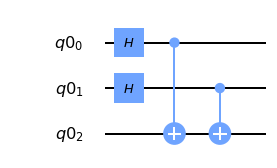

In [3]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

#cutedge checker
def ccheck(a, b, c): 
    qc.cx(q[a], q[c]) 
    qc.cx(q[b], q[c])

qc.h(q[0])
qc.h(q[1])
ccheck(0,1,2)
qc.draw(output='mpl')

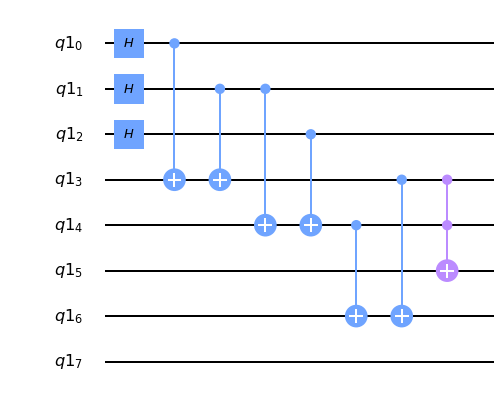

In [4]:
q = QuantumRegister(8)
qc = QuantumCircuit(q)

#half adder
#inputs: a,b 
#outputs: the sum output s and carry output c
def hadder(a,b,s,c):
    #XOR
    qc.cx(q[b], q[s])
    qc.cx(q[a], q[s])
    #AND
    qc.ccx(q[a], q[b], q[c])

qc.h(q[0:3])
ccheck(0,1,3)
ccheck(1,2,4)
hadder(3,4,6,5)

qc.draw(output='mpl')

{'0': 74966, '1': 25034}


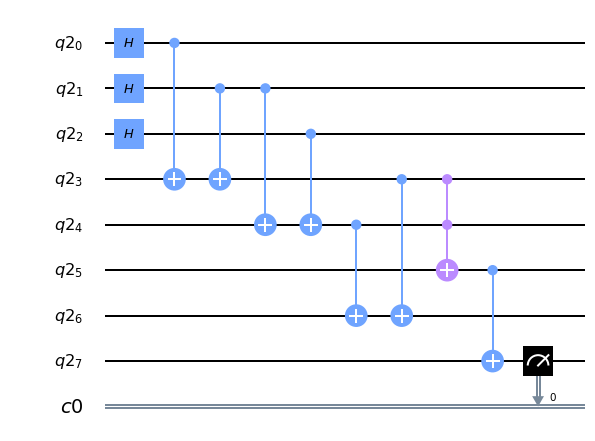

In [5]:
#create an oracle
q = QuantumRegister(8)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.h(q[0:3])
ccheck(0,1,3)
ccheck(1,2,4)
hadder(3,4,6,5)
qc.cx(q[5],q[7])
qc.measure(q[7], c[0])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=100000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

{'0000100': 127, '0000000': 140, '0000111': 133, '0000011': 126, '0000001': 100, '0000010': 120, '0000110': 125, '0000101': 129}


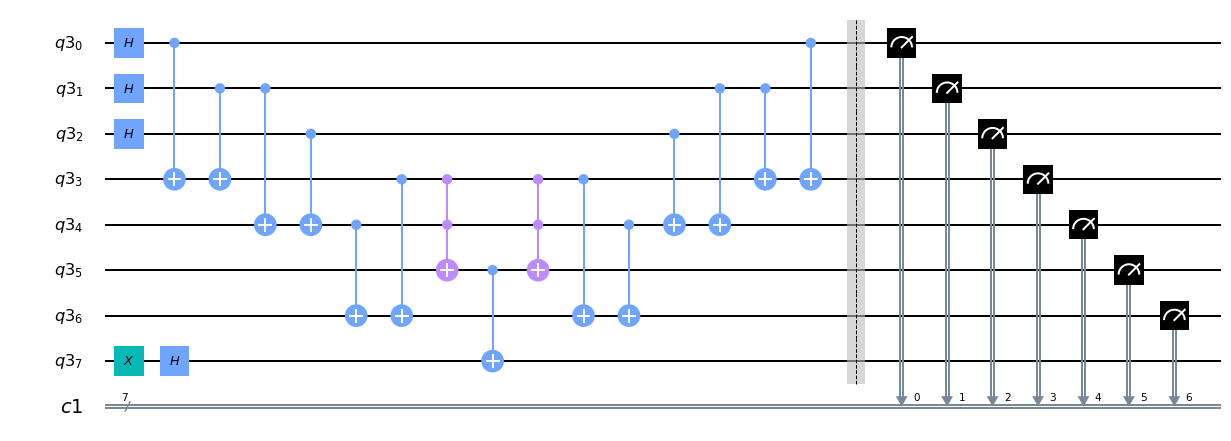

In [6]:
q = QuantumRegister(8)
c = ClassicalRegister(7)
qc = QuantumCircuit(q,c)

#inverse operations
def iccheck(a, b, c): 
    qc.cx(q[b], q[c])
    qc.cx(q[a], q[c]) 
def ihadder(a,b,s,c):
    qc.ccx(q[a], q[b], q[c])
    qc.cx(q[a], q[s])
    qc.cx(q[b], q[s])

qc.h(q[0:3])
qc.x(q[7])
qc.h(q[7])

ccheck(0,1,3)
ccheck(1,2,4)
hadder(3,4,6,5)
qc.cx(q[5],q[7])
ihadder(3,4,6,5)
iccheck(1,2,4)
iccheck(0,1,3)
qc.barrier()
qc.measure(q[0:7], c[0:7])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

{'101': 4992, '010': 5008}


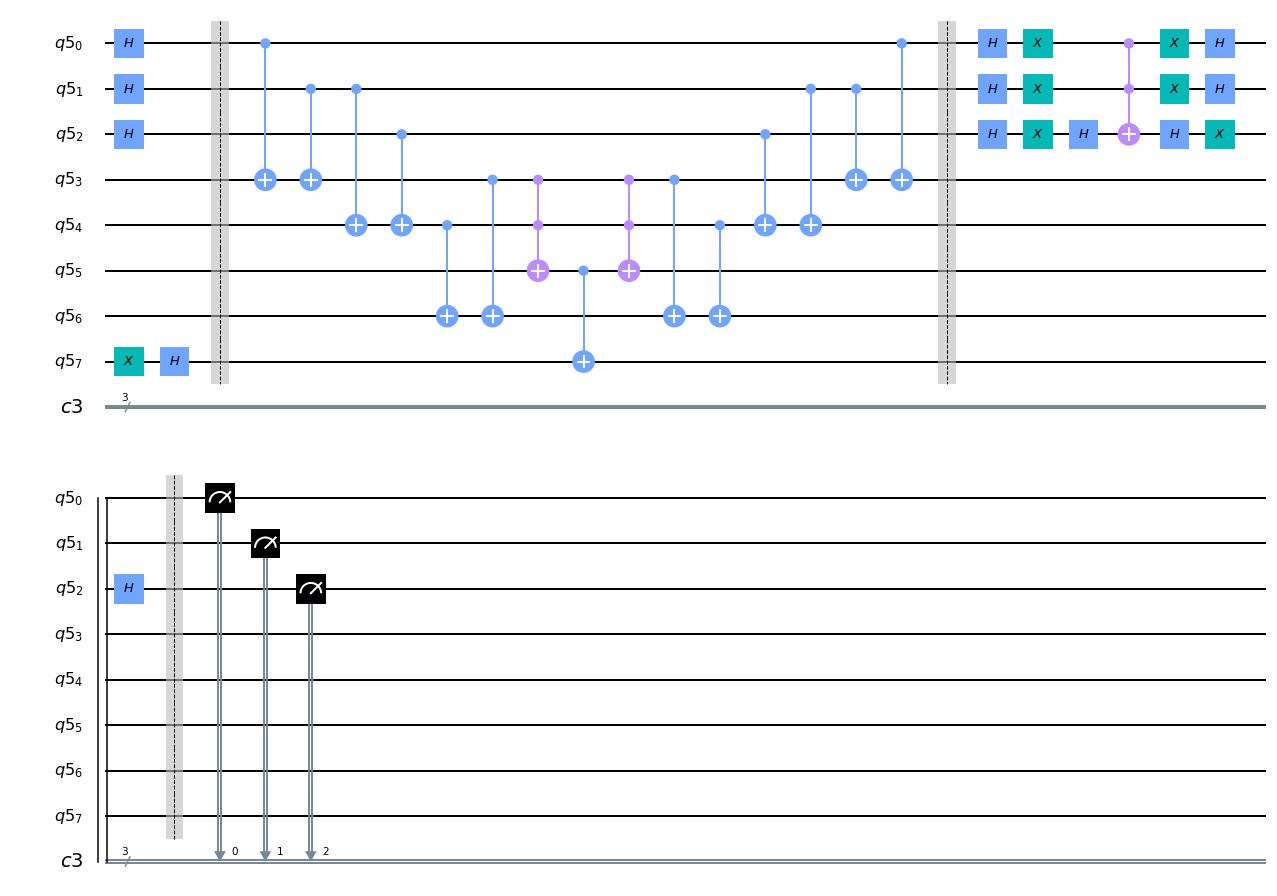

In [8]:
q = QuantumRegister(8)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

#diffusion operations
def diffusion(a,b,c):
    qc.h(q[a])
    qc.h(q[b])
    qc.h(q[c])    
    qc.x(q[a])
    qc.x(q[b])
    qc.x(q[c])
    qc.h(q[c])  
    qc.ccx(q[a],q[b], q[c])
    qc.h(q[c])  
    qc.x(q[a])
    qc.x(q[b])
    qc.x(q[c])
    qc.h(q[a])
    qc.h(q[b])
    qc.h(q[c])

#initialization
qc.h(q[0:3])
qc.x(q[7])
qc.h(q[7])
qc.barrier()

#oracle part
ccheck(0,1,3)
ccheck(1,2,4)
hadder(3,4,6,5)
qc.cx(q[5],q[7])
ihadder(3,4,6,5)
iccheck(1,2,4)
iccheck(0,1,3)
qc.barrier()

#diffusion part
diffusion(0,1,2)
qc.barrier()
qc.measure(q[0:3], c[0:3])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=10000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')
